In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
import itertools
from scipy import stats
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('gapminder.csv')
df.head()

,geo,time,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_percent,aged_15plus_employment_rate_percent,aged_15plus_labour_force_participation_rate_percent,aged_15plus_unemployment_rate_percent,...,underweight_children,urban_population,urban_population_growth_annual_percent,urban_population_percent_of_total,urban_poverty_percent_urban_people_below_national_urban,water_and_sanitation_aid_given_percent_of_aid,water_withdrawal_cu_meters_per_person,wood_removal_cubic_meters,working_hours_per_week,yearly_co2_emissions_1000_tonnes
0,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afg,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afg,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afg,1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afg,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.shape

(79309, 537)

In [5]:
df.columns.to_list()

['geo',
 'time',
 'adults_with_hiv_percent_age_15_49',
 'age_at_1st_marriage_women',
 'aged_15_24_employment_rate_percent',
 'aged_15_24_unemployment_rate_percent',
 'aged_15_64_labour_force_participation_rate_percent',
 'aged_15plus_employment_rate_percent',
 'aged_15plus_labour_force_participation_rate_percent',
 'aged_15plus_unemployment_rate_percent',
 'aged_25_54_labour_force_participation_rate_percent',
 'aged_25_54_unemployment_rate_percent',
 'aged_55_64_unemployment_rate_percent',
 'aged_65plus_labour_force_participation_rate_percent',
 'aged_65plus_unemployment_rate_percent',
 'agricultural_land_percent_of_land_area',
 'agricultural_water_withdrawal_percent_of_total',
 'agriculture_percent_of_gdp',
 'agriculture_workers_percent_of_employment',
 'aid_given_2007_us',
 'aid_given_per_person_2007_us',
 'aid_given_percent_of_gni',
 'aid_received_per_person_current_us',
 'aid_received_percent_of_gni',
 'aid_received_total_us_inflation_adjusted',
 'alcohol_consumption_per_adult_15pl

In [12]:
import plotly.express as px

gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [13]:
#change to lowercase
gapminder['iso_alpha'] = gapminder.iso_alpha.str.lower()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,afg,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,afg,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,afg,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,afg,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,afg,4


In [14]:
gapminder.iso_alpha.nunique()

141

In [15]:
df.geo.nunique()

264

In [16]:
gapminder.iso_alpha.unique()

array(['afg', 'alb', 'dza', 'ago', 'arg', 'aus', 'aut', 'bhr', 'bgd',
       'bel', 'ben', 'bol', 'bih', 'bwa', 'bra', 'bgr', 'bfa', 'bdi',
       'khm', 'cmr', 'can', 'caf', 'tcd', 'chl', 'chn', 'col', 'com',
       'cod', 'cog', 'cri', 'civ', 'hrv', 'cub', 'cze', 'dnk', 'dji',
       'dom', 'ecu', 'egy', 'slv', 'gnq', 'eri', 'eth', 'fin', 'fra',
       'gab', 'gmb', 'deu', 'gha', 'grc', 'gtm', 'gin', 'gnb', 'hti',
       'hnd', 'hkg', 'hun', 'isl', 'ind', 'idn', 'irn', 'irq', 'irl',
       'isr', 'ita', 'jam', 'jpn', 'jor', 'ken', 'kor', 'kwt', 'lbn',
       'lso', 'lbr', 'lby', 'mdg', 'mwi', 'mys', 'mli', 'mrt', 'mus',
       'mex', 'mng', 'mne', 'mar', 'moz', 'mmr', 'nam', 'npl', 'nld',
       'nzl', 'nic', 'ner', 'nga', 'nor', 'omn', 'pak', 'pan', 'pry',
       'per', 'phl', 'pol', 'prt', 'pri', 'reu', 'rou', 'rwa', 'stp',
       'sau', 'sen', 'srb', 'sle', 'sgp', 'svk', 'svn', 'som', 'zaf',
       'esp', 'lka', 'sdn', 'swz', 'swe', 'che', 'syr', 'twn', 'tza',
       'tha', 'tgo',

In [17]:
df.geo.unique()

array(['afg', 'ago', 'arg', 'arm', 'aus', 'aut', 'aze', 'bdi', 'bel',
       'ben', 'bfa', 'bgd', 'bgr', 'bhs', 'blr', 'blz', 'bol', 'bra',
       'brb', 'btn', 'bwa', 'caf', 'can', 'che', 'chl', 'chn', 'civ',
       'cmr', 'cog', 'col', 'com', 'cpv', 'cri', 'cub', 'cze', 'deu',
       'dji', 'dnk', 'dom', 'dza', 'ecu', 'egy', 'eri', 'esp', 'est',
       'eth', 'fin', 'fji', 'fra', 'gab', 'gbr', 'geo', 'gha', 'gin',
       'gmb', 'gnb', 'gnq', 'grc', 'gtm', 'guy', 'hnd', 'hrv', 'hti',
       'hun', 'idn', 'ind', 'irl', 'irn', 'isl', 'isr', 'ita', 'jam',
       'jpn', 'kaz', 'ken', 'kgz', 'khm', 'kor', 'lao', 'lbn', 'lbr',
       'lka', 'lso', 'ltu', 'lux', 'lva', 'mar', 'mda', 'mdg', 'mdv',
       'mex', 'mli', 'mlt', 'mmr', 'mng', 'moz', 'mrt', 'mus', 'mwi',
       'mys', 'nam', 'ner', 'nga', 'nic', 'nld', 'nor', 'npl', 'nzl',
       'omn', 'pak', 'pan', 'per', 'phl', 'png', 'pol', 'prt', 'pry',
       'qat', 'rou', 'rus', 'rwa', 'sdn', 'sen', 'sgp', 'sle', 'slv',
       'som', 'srb',

In [18]:
gapminder = gapminder.rename(columns = {'iso_alpha': 'geo', 
                                        'lifeExp': 'life_exp', 
                                        'gdpPercap': 'gdp_per_cap'
                                        })

In [19]:
df = pd.merge(df, gapminder, how = 'inner', on = 'geo')

df = df.rename(columns = {'children_per_woman_total_fertility': 'fertility'})

In [20]:
df.head()

,geo,time,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_percent,aged_15plus_employment_rate_percent,aged_15plus_labour_force_participation_rate_percent,aged_15plus_unemployment_rate_percent,...,wood_removal_cubic_meters,working_hours_per_week,yearly_co2_emissions_1000_tonnes,country,continent,year,life_exp,pop,gdp_per_cap,iso_num
0,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Afghanistan,Asia,1952,28.801,8425333,779.445314,4
1,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Afghanistan,Asia,1957,30.332,9240934,820.853030,4
2,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Afghanistan,Asia,1962,31.997,10267083,853.100710,4
3,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Afghanistan,Asia,1967,34.020,11537966,836.197138,4
4,afg,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Afghanistan,Asia,1972,36.088,13079460,739.981106,4


In [71]:
df.shape

(594864, 544)

In [55]:
df.isna().sum()

geo                                        0
time                                       0
adults_with_hiv_percent_age_15_49     562128
age_at_1st_marriage_women             587820
aged_15_24_employment_rate_percent    540720
                                       ...  
year                                       0
life_exp                                   0
pop                                        0
gdp_per_cap                                0
iso_num                                    0
Length: 544, dtype: int64

<Figure size 1152x9216 with 0 Axes>

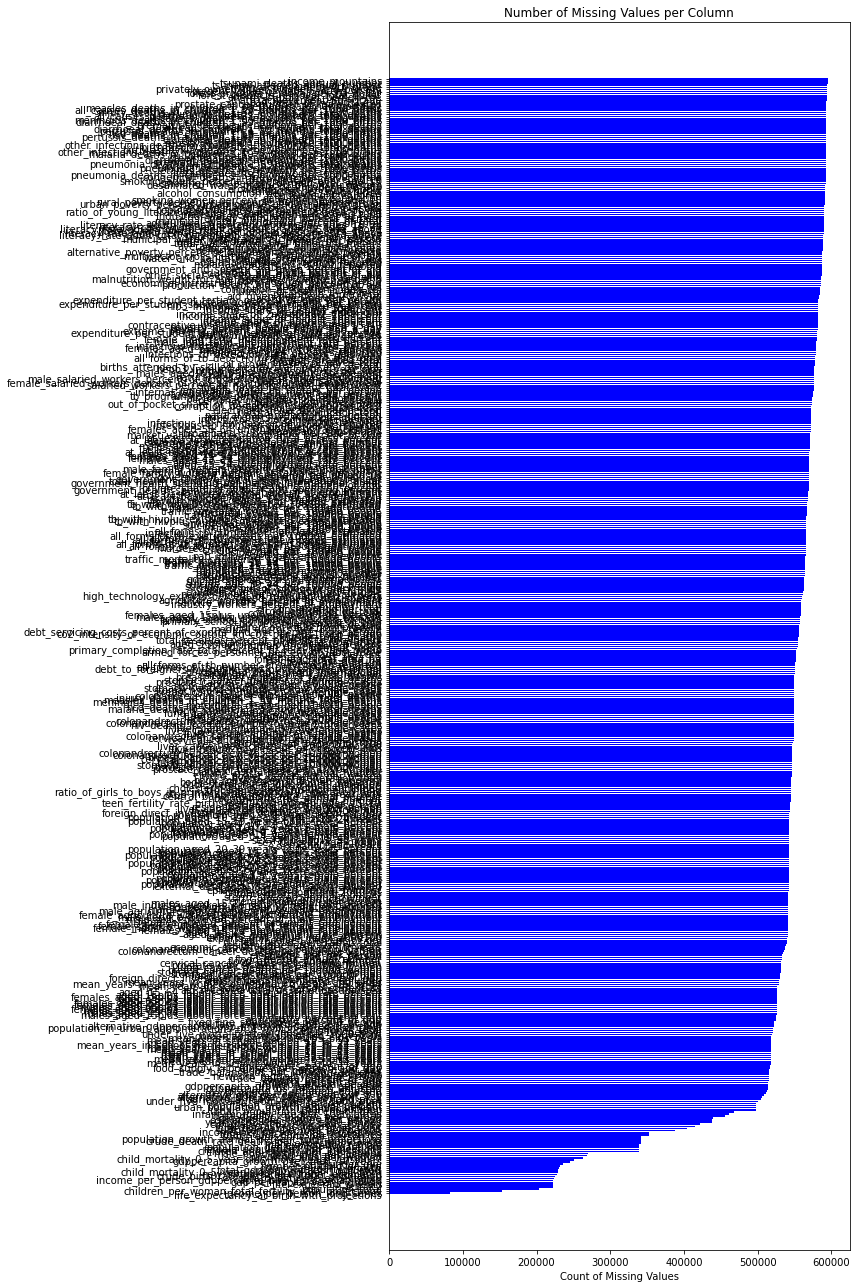

In [60]:
plt.figure(figsize = (16, 128))
missing_val = df.isnull().sum(axis = 0).reset_index()
missing_val.columns = ['column_name', 'amt_missing']
missing_val = missing_val.loc[missing_val['amt_missing'] > 0]
missing_val = missing_val.sort_values(by = 'amt_missing')

ind = np.arange(missing_val.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (12, 18))
rects = ax.barh(ind, missing_val.amt_missing.values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_val.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of Missing Values")
ax.set_title("Number of Missing Values per Column")

plt.tight_layout()
plt.show()

In [61]:
df.shape

(594864, 544)

In [73]:
#df.info

In [21]:
df.geo.nunique()

141

In [88]:
pd.set_option('display.max_columns',544)
na_df = df.isna().sum()

In [95]:
df.age_at_1st_marriage_women.mode()

0    25.3
dtype: float64

In [99]:
df.age_at_1st_marriage_women.isna().sum()

587820

In [101]:
df.fertility.isna().sum()

221688

In [114]:
df.groupby('fertility.mean()

5.396756704609482

In [102]:
df.fertility.median()

5.94

In [103]:
df.fertility.mode()

0    6.51
dtype: float64

In [104]:
df.annual_hiv_deaths_number_all_ages.isna().sum()

563772

In [107]:
df.annual_hiv_deaths_number_all_ages.mean()

10801.08838286376

In [105]:
df.annual_hiv_deaths_number_all_ages.median()

600.0

In [106]:
df.annual_hiv_deaths_number_all_ages.mode()

0    60.0
dtype: float64

In [9]:
df.groupby('continent').annual_hiv_deaths_number_all_ages.mean()

continent
Africa      22187.640562
Americas     4249.149378
Asia         7280.369610
Europe        489.656357
Oceania       184.545455
Name: annual_hiv_deaths_number_all_ages, dtype: float64

In [10]:
df.groupby('continent').annual_hiv_deaths_number_all_ages.median()

continent
Africa      3600.0
Americas    2100.0
Asia         150.0
Europe        60.0
Oceania      105.0
Name: annual_hiv_deaths_number_all_ages, dtype: float64

In [90]:
na = pd.DataFrame(na_df)
na.T

,geo,time,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_percent,aged_15plus_employment_rate_percent,aged_15plus_labour_force_participation_rate_percent,aged_15plus_unemployment_rate_percent,aged_25_54_labour_force_participation_rate_percent,aged_25_54_unemployment_rate_percent,aged_55_64_unemployment_rate_percent,aged_65plus_labour_force_participation_rate_percent,aged_65plus_unemployment_rate_percent,agricultural_land_percent_of_land_area,agricultural_water_withdrawal_percent_of_total,agriculture_percent_of_gdp,agriculture_workers_percent_of_employment,aid_given_2007_us,aid_given_per_person_2007_us,aid_given_percent_of_gni,aid_received_per_person_current_us,aid_received_percent_of_gni,aid_received_total_us_inflation_adjusted,alcohol_consumption_per_adult_15plus_litres,all_causes_deaths_in_children_1_59_months_per_1000_births,all_causes_deaths_in_children_1_59_months_total_deaths,all_causes_deaths_in_newborn_per_1000_births,all_causes_deaths_in_newborn_total_deaths,all_forms_of_tb_deaths_per_100000_estimated,all_forms_of_tb_detection_rate_percent,all_forms_of_tb_detection_rate_percent_dots_only,all_forms_of_tb_existing_cases_per_100000_estimated,all_forms_of_tb_new_cases_per_100000_estimated,all_forms_of_tb_new_cases_per_100000_reported,all_forms_of_tb_number_of_deaths_estimated,all_forms_of_tb_number_of_existing_cases_estimated,all_forms_of_tb_number_of_new_cases_estimated,all_forms_of_tb_number_of_new_cases_reported,alternative_gdp_per_capita_ppp_pwt_7_1,alternative_gdp_per_capita_ppp_pwt_8_0,alternative_gdp_per_capita_ppp_wb,alternative_gdppercapita_ppp_inflation_adjusted_from_pwt,alternative_poverty_percent_below_nationally_defined_poverty,annual_hiv_deaths_number_all_ages,armed_forces_personnel_percent_of_labor_force,armed_forces_personnel_total,arms_exports_us_inflation_adjusted,arms_imports_us_inflation_adjusted,art_coverage_percent_cd4_l_350,at_least_basic_sanitation_overall_access_percent,at_least_basic_sanitation_rural_access_percent,at_least_basic_sanitation_urban_access_percent,at_least_basic_water_source_overall_access_percent,at_least_basic_water_source_rural_access_percent,at_least_basic_water_source_urban_access_percent,average_age_of_dollar_billionaires_years,bad_teeth_per_child_12_yr,battle_deaths_per_100_000,biomass_stock_in_forest_tons,birth_asphyxia_deaths_in_newborn_per_1000_births,birth_asphyxia_deaths_in_newborn_total_deaths,births_attended_by_skilled_health_staff_percent_of_total,blood_pressure_sbp_men_mmhg,blood_pressure_sbp_women_mmhg,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,breast_cancer_deaths_per_100000_women,breast_cancer_new_cases_per_100000_women,breast_cancer_number_of_female_deaths,breast_cancer_number_of_new_female_cases,broadband_subscribers,broadband_subscribers_per_100_people,burns_deaths_per_100000_people,car_deaths_per_100000_people,cars_trucks_and_buses_per_1000_persons,cell_phones_per_100_people,cell_phones_total,central_bank_discount_rate_annual_percent,cervical_cancer_deaths_per_100000_women,cervical_cancer_new_cases_per_100000_women,cervical_cancer_number_of_female_deaths,cervical_cancer_number_of_new_female_cases,child_mortality_0_5_year_olds_dying_per_1000_born,child_mortality_0_5_year_olds_more_years_version_7,children_and_elderly_per_100_adults,children_out_of_school_primary,children_out_of_school_primary_female,children_out_of_school_primary_male,fertility,children_per_woman_total_fertility_with_projections,cholesterol_fat_in_blood_men_mmolperl,cholesterol_fat_in_blood_women_mmolperl,co2_emissions_tonnes_per_person,co2_intensity_of_economic_output_kg_co2_per_2011_ppp_of_gdp,coal_consumption_per_cap,coal_consumption_total,colonandrectum_cancer_deaths_per_100000_men,colonandrectum_cancer_deaths_per_100000_women,colonandrectum_cancer_new_cases_per_100000_men,colonandrectum_cancer_new_cases_per_100000_women,colonandrectum_cancer_

In [84]:
df.columns[df.isna().any()].tolist()

['adults_with_hiv_percent_age_15_49',
 'age_at_1st_marriage_women',
 'aged_15_24_employment_rate_percent',
 'aged_15_24_unemployment_rate_percent',
 'aged_15_64_labour_force_participation_rate_percent',
 'aged_15plus_employment_rate_percent',
 'aged_15plus_labour_force_participation_rate_percent',
 'aged_15plus_unemployment_rate_percent',
 'aged_25_54_labour_force_participation_rate_percent',
 'aged_25_54_unemployment_rate_percent',
 'aged_55_64_unemployment_rate_percent',
 'aged_65plus_labour_force_participation_rate_percent',
 'aged_65plus_unemployment_rate_percent',
 'agricultural_land_percent_of_land_area',
 'agricultural_water_withdrawal_percent_of_total',
 'agriculture_percent_of_gdp',
 'agriculture_workers_percent_of_employment',
 'aid_given_2007_us',
 'aid_given_per_person_2007_us',
 'aid_given_percent_of_gni',
 'aid_received_per_person_current_us',
 'aid_received_percent_of_gni',
 'aid_received_total_us_inflation_adjusted',
 'alcohol_consumption_per_adult_15plus_litres',
 'all

In [87]:
df.isna().sum()

542412    35
593220    34
549504    31
540720    16
518136    13
          ..
250944     1
514176     1
513888     1
519732     1
578376     1
Length: 309, dtype: int64

In [108]:
#df.dropna(axis = 0, how = 'any').shape I lose all of my rows this way

(0, 544)

In [62]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    df = df.dropna(axis = 0, thresh = n_required_row)
    df = df.dropna(axis = 1, thresh = n_required_column)
    return df

In [63]:
#use function to handle missing data to drop columns/rows that have 50% missing values

#df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5) all cols were removed

In [64]:
df.shape

(31644, 0)

In [112]:
handle_missing_values(df, prop_required_column = .10, prop_required_row = .10).shape

(113340, 113)

In [ ]:
#train, test, split
train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)

In [8]:
df.columns.to_list()

['geo',
 'time',
 'adults_with_hiv_percent_age_15_49',
 'age_at_1st_marriage_women',
 'aged_15_24_employment_rate_percent',
 'aged_15_24_unemployment_rate_percent',
 'aged_15_64_labour_force_participation_rate_percent',
 'aged_15plus_employment_rate_percent',
 'aged_15plus_labour_force_participation_rate_percent',
 'aged_15plus_unemployment_rate_percent',
 'aged_25_54_labour_force_participation_rate_percent',
 'aged_25_54_unemployment_rate_percent',
 'aged_55_64_unemployment_rate_percent',
 'aged_65plus_labour_force_participation_rate_percent',
 'aged_65plus_unemployment_rate_percent',
 'agricultural_land_percent_of_land_area',
 'agricultural_water_withdrawal_percent_of_total',
 'agriculture_percent_of_gdp',
 'agriculture_workers_percent_of_employment',
 'aid_given_2007_us',
 'aid_given_per_person_2007_us',
 'aid_given_percent_of_gni',
 'aid_received_per_person_current_us',
 'aid_received_percent_of_gni',
 'aid_received_total_us_inflation_adjusted',
 'alcohol_consumption_per_adult_15pl

In [6]:
df.geo.nunique()

264

AttributeError: 'DataFrame' object has no attribute 'iso_num'

#### Energy/Emissions

In [9]:
df.groupby('continent').electricity_generation_per_person.mean()

continent
Africa       2267.538626
Americas     4757.292449
Asia         4202.422845
Europe       7285.302393
Oceania     10070.772405
Name: electricity_generation_per_person, dtype: float64

In [10]:
df.groupby('continent').oil_consumption_total.mean()

continent
Africa      1.561294e+07
Americas    9.966007e+07
Asia        4.889540e+07
Europe      3.014871e+07
Oceania     1.965530e+07
Name: oil_consumption_total, dtype: float64

In [40]:
df.groupby('continent').co2_emissions_tonnes_per_person.mean()

continent
Africa      0.808747
Americas    3.127062
Asia        3.364307
Europe      4.080846
Oceania     5.749447
Name: co2_emissions_tonnes_per_person, dtype: float64

In [42]:
df.groupby('continent').co2_intensity_of_economic_output_kg_co2_per_2011_ppp_of_gdp.mean()

continent
Africa      0.172721
Americas    0.271720
Asia        0.311151
Europe      0.292989
Oceania     0.373705
Name: co2_intensity_of_economic_output_kg_co2_per_2011_ppp_of_gdp, dtype: float64

In [13]:
df.groupby('continent').yearly_co2_emissions_1000_tonnes.mean()

continent
Africa       11576.145054
Americas    194951.262653
Asia        142589.098055
Europe       82698.507457
Oceania      57232.343110
Name: yearly_co2_emissions_1000_tonnes, dtype: float64

#### Health/Life/Fertility

In [8]:
df.groupby('continent').life_exp.mean()

continent
Africa      48.872914
Americas    64.853471
Asia        61.134024
Europe      72.422212
Oceania     74.326208
Name: life_exp, dtype: float64

In [115]:
df.groupby('continent').life_exp.median()

continent
Africa      47.800
Americas    67.231
Asia        63.030
Europe      72.760
Oceania     73.665
Name: life_exp, dtype: float64

In [11]:
#df.groupby('continent').children_per_woman_total_fertility.mean()
df.groupby('continent').fertility.mean()

continent
Africa      6.258092
Americas    5.284378
Asia        5.672574
Europe      3.797802
Oceania     3.840114
Name: fertility, dtype: float64

In [14]:
df.groupby('continent').food_supply_kilocalories_per_person_and_day.mean()

continent
Africa      2242.551739
Americas    2519.742138
Asia        2479.893899
Europe      3224.394172
Oceania     3109.094340
Name: food_supply_kilocalories_per_person_and_day, dtype: float64

In [15]:
df.groupby('continent').teen_fertility_rate_births_per_1000_women_ages_15_19.mean()

continent
Africa      102.166048
Americas     82.327342
Asia         40.533466
Europe       25.371394
Oceania      33.179551
Name: teen_fertility_rate_births_per_1000_women_ages_15_19, dtype: float64

In [16]:
df.groupby('continent').total_health_spending_percent_of_gdp.mean()

continent
Africa      5.450825
Americas    7.048906
Asia        4.732127
Europe      8.215483
Oceania     8.161875
Name: total_health_spending_percent_of_gdp, dtype: float64

In [17]:
df.groupby('continent').suicide_men_per_100000_people.mean()

continent
Africa       9.293942
Americas    12.155827
Asia        15.418538
Europe      19.312551
Oceania     17.156890
Name: suicide_men_per_100000_people, dtype: float64

In [18]:
df.groupby('continent').suicide_women_per_100000_people.mean()

continent
Africa      3.159849
Americas    3.454808
Asia        7.658523
Europe      6.291388
Oceania     5.957705
Name: suicide_women_per_100000_people, dtype: float64

In [19]:
df.groupby('continent').maternal_mortality_ratio_per_100000_live_births.mean()

continent
Africa      625.902801
Americas    201.828740
Asia        423.715200
Europe      304.136735
Oceania     257.547826
Name: maternal_mortality_ratio_per_100000_live_births, dtype: float64

In [23]:
df.groupby('continent').life_expectancy_female.mean()

continent
Africa      64.495455
Americas    77.148020
Asia        74.464725
Europe      82.125536
Oceania     84.213273
Name: life_expectancy_female, dtype: float64

In [24]:
df.groupby('continent').life_expectancy_male.mean()

continent
Africa      60.711686
Americas    72.438285
Asia        70.440551
Europe      77.418947
Oceania     80.187403
Name: life_expectancy_male, dtype: float64

In [25]:
df.groupby('continent').contraceptive_use_percent_of_women_ages_15_49.mean()

continent
Africa      27.109302
Americas    60.196789
Asia        51.234262
Europe      69.988166
Oceania     69.290000
Name: contraceptive_use_percent_of_women_ages_15_49, dtype: float64

In [27]:
df.groupby('continent').adults_with_hiv_percent_age_15_49.mean()

continent
Africa      4.596222
Americas    0.598079
Asia        0.265466
Europe      0.151993
Oceania     0.100088
Name: adults_with_hiv_percent_age_15_49, dtype: float64

In [29]:
df.groupby('continent').annual_hiv_deaths_number_all_ages.mean()

continent
Africa      22187.640562
Americas     4249.149378
Asia         7280.369610
Europe        489.656357
Oceania       184.545455
Name: annual_hiv_deaths_number_all_ages, dtype: float64

In [32]:
df.groupby('continent').body_mass_index_bmi_men_kgperm2.mean()

continent
Africa      21.727086
Americas    24.791738
Asia        23.177774
Europe      25.747632
Oceania     26.258448
Name: body_mass_index_bmi_men_kgperm2, dtype: float64

In [33]:
df.groupby('continent').body_mass_index_bmi_women_kgperm2.mean()

continent
Africa      22.708911
Americas    25.506634
Asia        23.703960
Europe      25.295943
Oceania     25.536724
Name: body_mass_index_bmi_women_kgperm2, dtype: float64

#### Work

In [12]:
df.groupby('continent').working_hours_per_week.mean()

continent
Africa      43.307690
Americas    41.217576
Asia        45.000004
Europe      38.829193
Oceania     34.453168
Name: working_hours_per_week, dtype: float64

In [20]:
df.groupby('continent').male_long_term_unemployment_rate_percent.mean()

continent
Africa      2.572289
Americas    0.697356
Asia        1.120309
Europe      2.679228
Oceania     1.437936
Name: male_long_term_unemployment_rate_percent, dtype: float64

In [21]:
df.groupby('continent').female_long_term_unemployment_rate_percent.mean()

continent
Africa      2.852717
Americas    0.739607
Asia        0.632228
Europe      2.325810
Oceania     0.931356
Name: female_long_term_unemployment_rate_percent, dtype: float64

In [22]:
df.groupby('continent').military_expenditure_percent_of_gdp.mean()

continent
Africa      2.447780
Americas    2.030244
Asia        4.951190
Europe      2.163178
Oceania     2.131005
Name: military_expenditure_percent_of_gdp, dtype: float64

In [26]:
df.groupby("continent").mean_years_in_school_women_of_reproductive_age_15_to_44.mean()

continent
Africa       3.014650
Americas     7.454792
Asia         5.923203
Europe       9.597845
Oceania     10.967500
Name: mean_years_in_school_women_of_reproductive_age_15_to_44, dtype: float64

In [28]:
df.groupby('continent').age_at_1st_marriage_women.mean()

continent
Africa      21.528889
Americas    22.791163
Asia        20.553642
Europe      25.018011
Oceania     23.801538
Name: age_at_1st_marriage_women, dtype: float64

In [30]:
df.groupby('continent').battle_deaths_per_100_000.mean()

continent
Africa      13.289894
Americas     1.345224
Asia         7.018809
Europe       0.069824
Oceania      0.000000
Name: battle_deaths_per_100_000, dtype: float64

In [31]:
df.groupby('continent').armed_forces_personnel_percent_of_labor_force.mean()

continent
Africa      1.146787
Americas    1.028516
Asia        3.050411
Europe      1.565364
Oceania     0.516253
Name: armed_forces_personnel_percent_of_labor_force, dtype: float64

In [34]:
df.groupby('continent').children_out_of_school_primary_female.mean()

continent
Africa      379530.689691
Americas     66955.736842
Asia        564010.236207
Europe       23657.000000
Oceania      20693.962963
Name: children_out_of_school_primary_female, dtype: float64

In [35]:
df.groupby('continent').children_out_of_school_primary_male.mean()

continent
Africa      307163.684536
Americas     74051.875000
Asia        367103.705172
Europe       23625.731588
Oceania      29635.629630
Name: children_out_of_school_primary_male, dtype: float64

In [36]:
df.groupby('continent').children_out_of_school_primary.mean()

continent
Africa      654986.554194
Americas    180049.295567
Asia        810575.151473
Europe       47215.802969
Oceania      35629.025974
Name: children_out_of_school_primary, dtype: float64

In [37]:
df.groupby('continent').average_age_of_dollar_billionaires_years.mean()

continent
Africa       2.193077
Americas    21.025100
Asia        30.731515
Europe      39.048083
Oceania     45.643750
Name: average_age_of_dollar_billionaires_years, dtype: float64

In [38]:
df.groupby('continent').gdppercapita_growth_percent_per_year.mean()

continent
Africa      1.383742
Americas    1.779222
Asia        3.174643
Europe      2.586406
Oceania     1.657453
Name: gdppercapita_growth_percent_per_year, dtype: float64

In [39]:
df.groupby('continent').aged_65plus_labour_force_participation_rate_percent.mean()

continent
Africa      42.559854
Americas    26.870510
Asia        22.669324
Europe       7.332699
Oceania     13.165183
Name: aged_65plus_labour_force_participation_rate_percent, dtype: float64

In [44]:
df.corr().T

,time,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_percent,aged_15plus_employment_rate_percent,aged_15plus_labour_force_participation_rate_percent,aged_15plus_unemployment_rate_percent,aged_25_54_labour_force_participation_rate_percent,...,water_and_sanitation_aid_given_percent_of_aid,water_withdrawal_cu_meters_per_person,wood_removal_cubic_meters,working_hours_per_week,yearly_co2_emissions_1000_tonnes,year,life_exp,pop,gdp_per_cap,iso_num
time,1.000000e+00,9.723905e-02,1.037752e-01,-1.187877e-01,1.400205e-01,7.385613e-02,3.249194e-02,-2.085395e-02,1.699892e-01,1.144782e-01,...,2.069652e-02,-1.785185e-02,7.669705e-03,-1.373062e-01,1.047943e-01,6.439436e-14,-0.227174,-0.322842,-0.179347,2.831466e-02
adults_with_hiv_percent_age_15_49,9.723905e-02,1.000000e+00,-1.525395e-01,-5.350683e-02,2.838710e-01,9.171691e-02,5.380377e-02,2.281456e-01,3.591579e-01,1.388900e-01,...,-1.990789e-01,-2.905389e-01,-7.492354e-02,1.020095e-01,-8.086619e-02,-3.647407e-14,-0.308206,-0.090870,-0.221807,1.112392e-01
age_at_1st_marriage_women,1.037752e-01,-1.525395e-01,1.000000e+00,-1.753824e-01,6.533345e-02,4.314606e-02,-2.461587e-01,-2.522176e-01,1.330378e-01,9.355199e-02,...,1.141315e-01,3.249573e-01,3.917443e-02,-2.170165e-01,1.159216e-01,4.849880e-15,0.467956,-0.275877,0.419656,1.977222e-01
aged_15_24_employment_rate_percent,-1.187877e-01,-5.350683e-02,-1.753824e-01,1.000000e+00,-6.965013e-01,7.726163e-01,8.623414e-01,8.006008e-01,-5.887645e-01,5.725481e-01,...,6.305916e-02,3.966244e-02,1.366980e-01,-2.039026e-01,6.869639e-02,7.458861e-14,-0.132658,0.073427,-0.033502,2.747295e-03
aged_15_24_unemployment_rate_percent,1.400205e-01,2.838710e-01,6.533345e-02,-6.965013e-01,1.000000e+00,-4.120408e-01,-7.036294e-01,-5.143363e-01,9.205979e-01,-2.181150e-01,...,-1.095319e-01,-4.795391e-02,-6.978280e-02,-1.295514e-02,-1.005250e-01,-1.240354e-14,-0.003875,-0.130194,-0.105019,6.978760e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,6.439436e-14,-3.647407e-14,4.849880e-15,7.458861e-14,-1.240354e-14,7.776237e-14,7.085775e-14,5.382340e-14,-5.204293e-14,7.429851e-14,...,-2.456666e-14,-2.357811e-15,-4.125266e-14,5.174174e-15,-4.315849e-14,1.000000e+00,0.425934,0.080419,0.272439,-1.730524e-13
life_exp,-2.271744e-01,-3.082055e-01,4.679564e-01,-1.326576e-01,-3.874739e-03,6.402012e-02,-2.198303e-01,-2.620270e-01,-5.658362e-02,9.437039e-02,...,1.590123e-02,2.089764e-01,9.047545e-02,-3.288803e-01,1.084836e-01,4.259343e-01,1.000000,0.074582,0.628567,1.815630e-02
pop,-3.228416e-01,-9.087049e-02,-2.758768e-01,7.342678e-02,-1.301939e-01,3.347160e-02,6.451567e-02,2.151378e-02,-1.373730e-01,3.706241e-03,...,-1.920718e-02,3.801746e-02,4.796144e-01,4.733180e-02,3.659360e-01,8.041944e-02,0.074582,1.000000,-0.060150,-1.348064e-01
gdp_per_cap,-1.793469e-01,-2.218065e-01,4.196564e-01,-3.350241e-02,-1.050192e-01,1.312656e-01,-6.096927e-02,-1.069125e-01,-1.634745e-01,1.485023e-01,...,2.186763e-02,1.784451e-01,1.270005e-01,-3.785707e-01,1.282149e-01,2.724393e-01,0.628567,-0.060150,1.000000,4.409004e-02


<AxesSubplot:xlabel='fertility', ylabel='life_exp'>

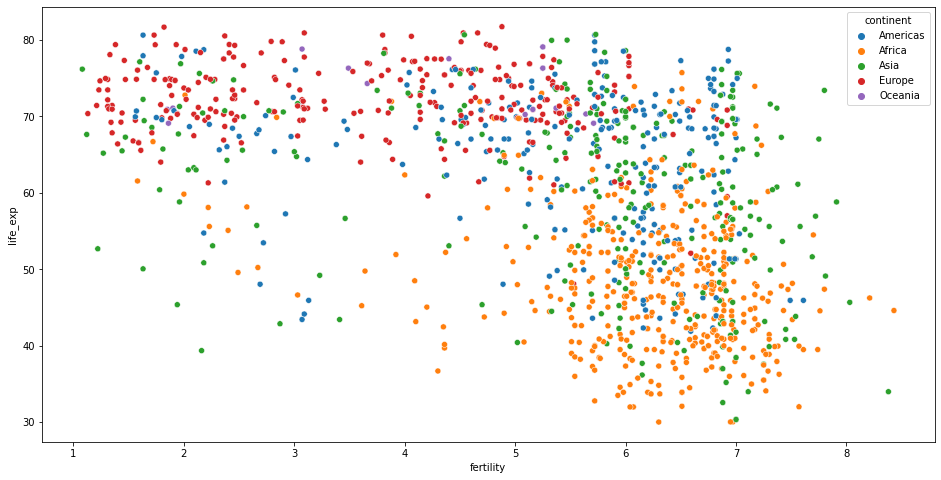

In [52]:
#figsize(w , l)
plt.figure(figsize = (16, 8))
sns.scatterplot(data = df.sample(2000), 
               x = 'fertility',
               y = 'life_exp', 
               hue = 'continent')

train['DAYS_EMPLOYED'] =  (train.groupby(['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AGE_GROUP'],
                                         dropna=False)
                                ['DAYS_EMPLOYED']
                                .apply(lambda x: x.fillna(x.median()))
                          )


#### Fix Nulls

In [13]:
nulls = df.copy().drop('country', 1).isna().groupby(df.country, sort = False).sum().reset_index()
nulls

,country,geo,time,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_percent,aged_15plus_employment_rate_percent,aged_15plus_labour_force_participation_rate_percent,...,water_withdrawal_cu_meters_per_person,wood_removal_cubic_meters,working_hours_per_week,yearly_co2_emissions_1000_tonnes,continent,year,life_exp,pop,gdp_per_cap,iso_num
0,Afghanistan,0,0,3588,3600,3240,3600,3132,3240,3132,...,3588,3360,3624,2832,0,0,0,0,0,0
1,Angola,0,0,3348,3612,3240,3600,3132,3240,3132,...,3588,3360,3624,2844,0,0,0,0,0,0
2,Argentina,0,0,3348,3600,3240,3480,3132,3240,3132,...,3588,3360,3372,2088,0,0,0,0,0,0
3,Australia,0,0,3360,3480,3252,3168,3144,3252,3144,...,3576,3372,3276,1668,0,0,0,0,0,0
4,Austria,0,0,6936,7128,6828,6780,6720,6828,6720,...,7140,6948,6936,4848,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Reunion,0,0,3624,3600,3624,3588,3624,3624,3624,...,3624,3360,3612,2844,0,0,0,0,0,0
138,Saudi Arabia,0,0,3624,3612,3240,3468,3132,3240,3132,...,3600,3360,3552,2664,0,0,0,0,0,0
139,Syria,0,0,3624,3612,3240,3552,3132,3240,3132,...,3576,3360,3624,2616,0,0,0,0,0,0
140,Taiwan,0,0,2796,2640,2412,2316,2304,2412,2304,...,2796,2796,2796,1368,0,0,0,0,0,0


train['DAYS_EMPLOYED'] =  (train.groupby(['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AGE_GROUP'],
                                         dropna=False)
                                ['DAYS_EMPLOYED']
                                .apply(lambda x: x.fillna(x.median()))
                          )

In [22]:
df.country.nunique()

142

In [ ]:
df['fertility'] = (df.groupby['country', ])

pd.set_option('display.max_columns', 544)
pd.set_option('display.max_rows', 142)
nulls.head(142)

In [11]:
df.fertility.isna().sum()

221688

In [ ]:
df.drop('CLASS', 1).isna().groupby(df.CLASS, sort=False).sum().reset_index()

In [ ]:
df['fertility']